In [6]:
%matplotlib inline
import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [7]:
df = pd.read_csv('processed_data.csv')

In [8]:
# df=df.set_index('Arrival Date/Time')
df.columns = ['ds', 'y']
df

,ds,y
0,2019-02-22 00:00:00,5
1,2019-02-22 01:00:00,4
2,2019-02-22 02:00:00,2
3,2019-02-22 03:00:00,5
4,2019-02-22 04:00:00,1
...,...,...
9859,2020-04-07 19:00:00,4
9860,2020-04-07 20:00:00,5
9861,2020-04-07 21:00:00,5
9862,2020-04-07 22:00:00,3


In [9]:
df.dtypes

ds    object
y      int64
dtype: object

In [10]:

df.describe()

,y
count,9864.000000
mean,5.761861
std,3.697603
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,24.000000


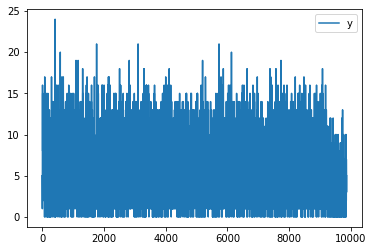

In [11]:
df.plot()

In [12]:
from pandas import to_datetime
df['ds']= to_datetime(df['ds'])

In [1]:
# conda remove --force fbprophet


## Package Plan ##

  environment location: C:\Users\akank\anaconda3

  removed specs:
    - fbprophet


The following packages will be REMOVED:

  fbprophet-0.7.1-py37h1834ac0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
# pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=509350 sha256=3e6b2d7b899986a16d77e85b63a21ec1846d7082839242cb50dcbd68e95f445f
  Stored in directory: c:\users\akank\appdata\local\pip\cache\wheels\cd\a1\12\db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
Note: you may need to restart the kernel to use updated packages.


In [14]:
from fbprophet import Prophet
model = Prophet()

In [15]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\akank\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
future = model.make_future_dataframe(freq='H', periods=5)

In [17]:
future.tail()

,ds
9864,2020-04-08 00:00:00
9865,2020-04-08 01:00:00
9866,2020-04-08 02:00:00
9867,2020-04-08 03:00:00
9868,2020-04-08 04:00:00


In [18]:
forecast = model.predict(future)

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9864,2020-04-08 00:00:00,2.113685,-0.860379,5.239378
9865,2020-04-08 01:00:00,1.364643,-2.025110,4.648414
9866,2020-04-08 02:00:00,0.845274,-2.367894,4.042538
9867,2020-04-08 03:00:00,0.516400,-2.824148,3.791953
9868,2020-04-08 04:00:00,0.248561,-2.810894,3.582022


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-02-22 00:00:00,4.401488,1.086684,7.470748
1,2019-02-22 01:00:00,3.670644,0.433106,6.946488
2,2019-02-22 02:00:00,3.168777,-0.072071,6.319032
3,2019-02-22 03:00:00,2.856663,-0.351668,6.032314
4,2019-02-22 04:00:00,2.604786,-0.896908,5.611429


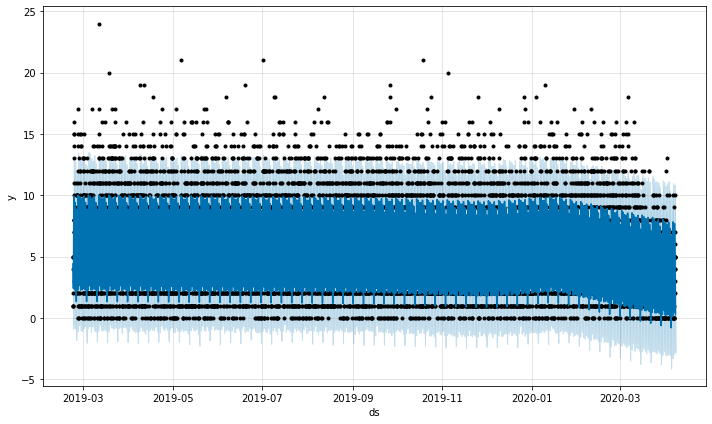

In [21]:
fig1 = model.plot(forecast)


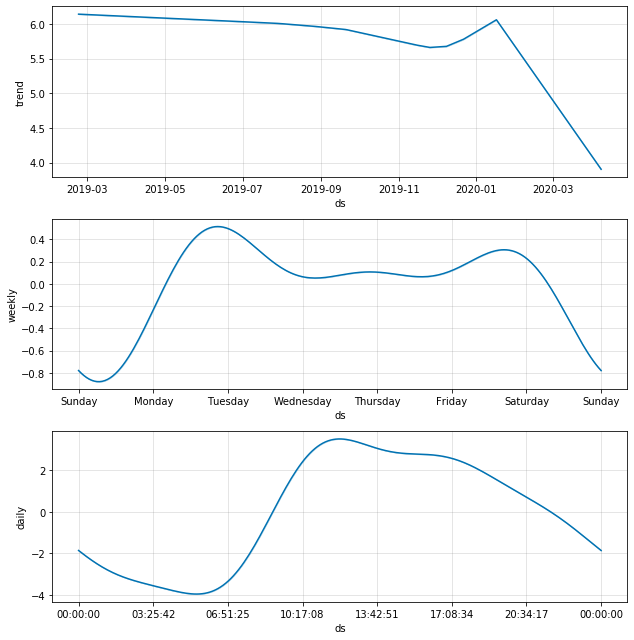

In [22]:
fig2 = model.plot_components(forecast)


In [23]:
from fbprophet.diagnostics import cross_validation

In [30]:
cv_results = cross_validation(model, initial='1000 hours', period='500 hours', horizon='24 hour')

INFO:fbprophet:Making 18 forecasts with cutoffs between 2019-04-18 19:00:00 and 2020-04-06 23:00:00


C:\Users\akank\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\akank\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\akank\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\akank\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtyp

In [31]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-18 20:00:00,7.384796,4.026603,10.801594,3,2019-04-18 19:00:00
1,2019-04-18 21:00:00,6.847721,3.318883,10.153722,8,2019-04-18 19:00:00
2,2019-04-18 22:00:00,6.150236,2.765119,9.520430,8,2019-04-18 19:00:00
3,2019-04-18 23:00:00,5.225881,2.137099,8.602816,5,2019-04-18 19:00:00
4,2019-04-19 00:00:00,4.232644,0.757374,7.329530,5,2019-04-18 19:00:00


In [32]:
cv_results.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
427,2020-04-07 19:00:00,5.718567,2.628060,8.804172,4,2020-04-06 23:00:00
428,2020-04-07 20:00:00,5.087821,1.848824,8.293597,5,2020-04-06 23:00:00
429,2020-04-07 21:00:00,4.464990,1.251311,7.562398,5,2020-04-06 23:00:00
430,2020-04-07 22:00:00,3.785765,0.466188,7.115561,3,2020-04-06 23:00:00
431,2020-04-07 23:00:00,2.985039,-0.531931,6.303053,5,2020-04-06 23:00:00


In [33]:
from fbprophet.diagnostics import performance_metrics

In [35]:
df_p = performance_metrics(cv_results)
df_p.tail()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
17,0 days 20:00:00,6.005706,2.450654,1.992139,0.339564,0.833333
18,0 days 21:00:00,5.447447,2.333977,1.816421,0.252472,0.870801
19,0 days 22:00:00,4.773118,2.184747,1.686084,0.246584,0.888889
20,0 days 23:00:00,3.860391,1.964788,1.591911,0.246584,0.935401
21,1 days 00:00:00,5.594307,2.365229,1.827639,0.261922,0.865633


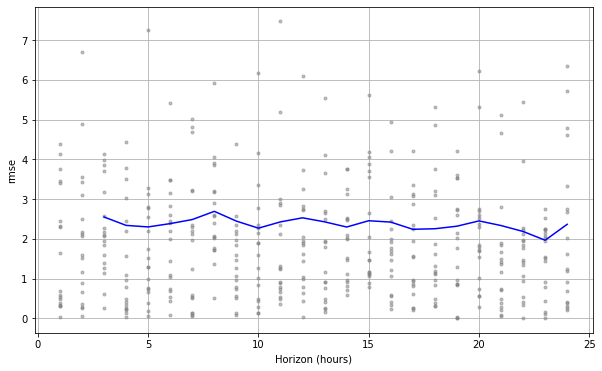

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

## TabPy

In [ ]:
SCRIPT_REAL("import pandas as pd
import numpy as np
from fbprophet import Prophet

period= _arg3[0]+1
df=pd.DataFrame({'ds':_arg1,'y': _arg2})
m=Prophet()
df=df[:-period]
m.fit(df)
            
future=m.make_future_dataframe(periods=period)
forecast=m.predict(future)
return forecast['yhat'].tolist()
            
",ATTR([Arrival Date/Time]), SUM([Arrival Date/Time 1]))